In [1]:
from simulation_parser import parse_simulation_files

In [2]:
static_file = "../Simulation/static.txt"
dynamic_file = "../Simulation/dynamic.txt"

In [3]:
sim_info = parse_simulation_files(static_file, dynamic_file)

In [4]:
from simulation_parser import SimulationInfo
import numpy as np
import math

def get_velocities(sim_info : SimulationInfo) -> np.ndarray:
    instant_count = len(sim_info.instants)

    velocities = np.zeros((instant_count, sim_info.N))
    for inst_idx in range(instant_count):
        for p_idx in range(sim_info.N):
            velocities[inst_idx, p_idx] = sim_info.particles[p_idx].velocity[inst_idx][0]

    return velocities

def bin_count_by_sturges(samples : np.ndarray) -> int:
    number_of_samples = samples.size
    return math.ceil((math.log2(number_of_samples)+1))

def get_class_width(bin_edges : np.ndarray) -> float:
    class_widths = (bin_edges[1:] - bin_edges[:-1])
    return class_widths.mean()

def data_to_hist(data : np.ndarray) -> tuple[np.ndarray, np.ndarray, float]:
    bin_count         = bin_count_by_sturges(data)
    counts, bin_edges = np.histogram(data, bins=bin_count)
    class_width       = get_class_width(bin_edges)
    return (counts, bin_edges, class_width)

def probas_from_hist(counts : np.ndarray, bin_edges : np.ndarray) -> np.ndarray:
    bin_count = bin_edges.size-1
    probas    = counts / bin_count
    return probas

def pdf_from_probas(probas : np.ndarray, class_width : float) -> np.ndarray:
    area_per_bin = probas * class_width
    
    dx = np.sum(area_per_bin)
    
    pdf = probas / dx
    return pdf

def bins_center_points(bin_edges : np.ndarray) -> np.ndarray:
    half_bins = (bin_edges[:-1] + bin_edges[1:]) / 2
    return half_bins

def data_to_pdf(data : np.ndarray) -> tuple[np.ndarray, np.ndarray, float]:
    counts, bin_edges, class_width = data_to_hist(data)
    
    probas = probas_from_hist(counts, bin_edges)
    pdf    = pdf_from_probas(probas, class_width)
    values = bins_center_points(bin_edges)

    return (pdf, values, class_width)

In [5]:
velocities = get_velocities(sim_info)

In [6]:
velocities.size

36020

In [7]:
from_v = -100
to_v   = -1

In [8]:
selected_velocities = np.resize(velocities[from_v:to_v], velocities[from_v:to_v].size)

In [9]:
pdf, values, class_width = data_to_pdf(selected_velocities)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Velocidades (cm/s)')

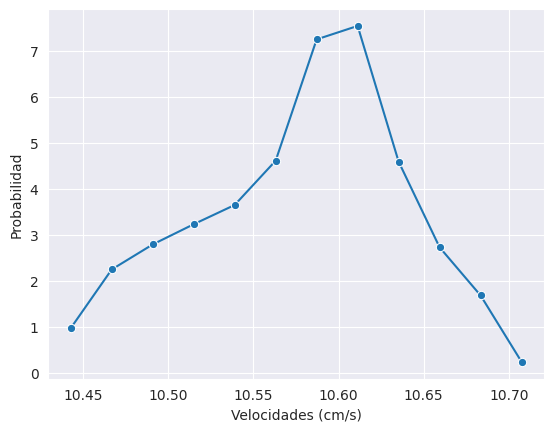

In [11]:
sns.set_style("darkgrid")
sns.lineplot(x=values, y=pdf, marker="o")
plt.ylabel("Probabilidad")
plt.xlabel("Velocidades (cm/s)")